<a href="https://colab.research.google.com/github/Oliveiras96/2nd-ILUM-Machine-Learning-School/blob/main/multimodal_function_GP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data_list: [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]] 120
z_list: [0, 0, 0, 0, 0, 

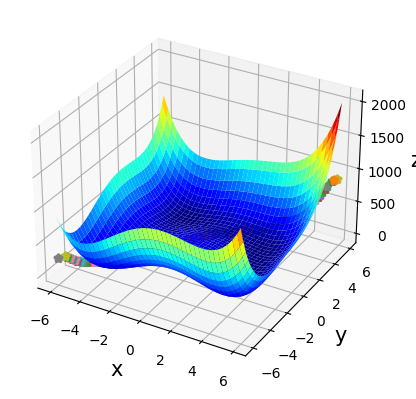

In [ ]:
# ----------------------------------#
# Artificial in a nut shell course. #
# ----------------------------------#
# All credits to Maicon Pierre Lourenco (MPL)
# maiconpl01@gmail.com
# Last modification: 07/12/22

from numpy import arange
from numpy import meshgrid
import numpy as np
%matplotlib inline
from matplotlib import pyplot
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

# objective function
def objective(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 -7)**2

# define range for input
r_min, r_max = -6.0, 6.0
# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)

# GP from scikit-learn

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF
from sklearn.model_selection import train_test_split

kernel02 = 30*DotProduct(1.0, (1e-3, 1e3)) + 100 * WhiteKernel(10.0, (1e-3, 1e3)) + 1 * RBF(length_scale=1.0)

gp = GaussianProcessRegressor(kernel=kernel02, alpha=1e-8, n_restarts_optimizer=10, random_state=80)

data_list = [[0 for i in range(2)] for j in range(len(xaxis))]
z_list = [0 for i in range(len(xaxis))]

print("data_list:", data_list, len(data_list))
print("z_list:", z_list, len(z_list))

for i in range(len(data_list)):
    data_list[i][0] = round(xaxis[i], 2)
    data_list[i][1] = round(yaxis[i], 2)
    z_list[i] = objective( round(xaxis[i], 2), round(yaxis[i],2) )

print("data_list before:", data_list, np.array(data_list).shape)
print("len(z_list):", len(z_list))

X_train, X_test, y_train, y_test = train_test_split(data_list, z_list, test_size=0.80, random_state=42)

gp.fit(X_train, y_train)

print("R2 of predicted 'all data' from data_list: {:.4f}".format( gp.score(data_list, z_list)) )
print("R2 of predicted 'train' from X_train: {:.4f}".format( gp.score(X_train, y_train)) )
print("R2 of predicted 'test' from Y_test: {:.4f}".format( gp.score(X_test, y_test)) )

# Define the virutal space, where the ML prediction is done
data_list_virtual = np.arange(0.0, 5.0, 0.001).tolist

# To visualize the prediction of the virtual data (x, y) from the GP regression model
for i in range(len(X_test)):
    print("X_test obs and pred:", X_test[i], np.array(X_test[i]).reshape(-1,1), y_test[i], gp.predict([X_test[i]]) )

# create a surface plot with the jet color scheme
#figure = pyplot.figure()
#axis = figure.gca(projection='3d')
axis = plt.axes(projection='3d')
axis.plot_surface(x, y, results, cmap='jet')

axis.set_xlabel('x', fontsize=15)
axis.set_ylabel('y', fontsize=15)
axis.set_zlabel('z', fontsize=15)

virtual = [0.0, -6.0]
virtual02 = [0.0, -10.0]

print("virtual02: ", virtual02)
print("np.array(virtual02).reshape(1,-1)", np.array(virtual02).reshape(1,-1))
print("np.array(virtual02).reshape(-1,1)", np.array(virtual02).reshape(-1,1))

for i in range(len(X_test)):
    axis.scatter( X_test[i][0], X_test[i][1], gp.predict( [X_test[i]]  ) , marker="*", linewidths=3.0, alpha=1.0)

    #axis.scatter( 0.0, -4.0, gp.predict( [[0.0, -4.0]] ) , marker="*", linewidths=3.0, alpha=1.0)
    #axis.scatter( virtual[0], virtual[1], gp.predict( [virtual] ) , marker="*", linewidths=3.0, alpha=1.0)
    #axis.scatter( virtual02[0], virtual02[1], gp.predict( [np.array(virtual02).reshape(1,-1)[0]] ) , marker="*", linewidths=3.0, alpha=1.0) # IT DOES WORK

# show the plot
#pyplot.show()